# Fundamentals of Neural Networks

Neural Networks have been extensively employed to solve classification problems. In this tutorial, we shall try to explore how they work.

<center>![Artificial Neural Network](images/Title_ANN.png)
[//]: # (<center>![MNIST NN](images/digitsNN.png))
[//]: # (<center>![Optimizers](images/optimizers.gif))


In [28]:
# Importing pre-requisites
import numpy as np
from ipywidgets import *

# For plots
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# For 3D plots
from mpl_toolkits.mplot3d import Axes3D 

# To clear print buffer
from IPython.display import clear_output

# Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Introduction to Classification

**Objective**: To guess the class of an input

**Input X**: A $d_{i}$-dimensional number (anything can be reduced to numbers), with each dimensional value ranging between 0 and 1

**Output (class) Z**: A $d_{o}$-dimensional number, considering there are $d_{o}$ classes the input could belong to. The dimension that has the maximum value among all the $d_{o}$ dimensions is the class the input X belongs to.

For example, given a 50pixels X 50pixels image of a face, it needs to be figured out whether the face is more likely to belong to Alice or Bob. So our input has $d_{i} = 50*50 =$ 2500 dimensions. Our output has $d_{0} =$ 2 dimensions (Alice, Bob), and the output value in each dimension lies between 0 and 1. So for a face if the output is $(0.3, 0.8)$, it means there is 30% chance that the input face is that of Alice, and 80% chance that is belongs to Bob.

# Neural Networks

Neural networks are maps from the $d_{i}$-dimensional input X to the $d_{o}$-dimensional output Z. In the above image, $d_{i}$ is 3, and $d_{o}$ is 2. Recently they have been performing exceedingly well (better than humans) at classification problems.

The basic building block of a neural network is a neuron (the orange-coloured circles in the first picture). Each neuron takes, say, $p$-dimensional input and outputs a number between 0 and 1 (one-dimensional).

- We shall first start with visualizing what a single neuron does to a one-dimensional input, and then move on to the effect on multi-dimensional inputs, and how they can be represented as matrix operations.

## Visualizing one neuron's action with a one-dimensional input

A neuron takes an input number, $x$, multiplies it with a weight $w_{1}$, adds a bias weight $w_{0}$ to it, and passes it through a non-linear function, like sigmoid.

In the following example, we shall visualize the action of a single neuron to a single input.
- Try tweaking the weights $w_{0}$ and $w_{1}$ using the sliders
- The weights set on the sliders are displayed in the neuron
- The corresponding changes in the output of the weighted sum, and the output of the neuron are also displayed as graphs


In [33]:
# Visualizing one neuron's output, changing weights w_0 and w_1
def oneNeuron1DInput(w0, w1):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.4])
    axes2 = fig1.add_axes([0.54, 0.24, 0.07, 0.12])
    # drawing inputs
    axes1.text(-1.68, 0.7, "(bias)")
    axes1.text(-1.15, 0.7, "1", weight='bold')
    axes1.arrow(-1, 0.7, 0.5, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2.5, -0.1, "(input)", size='xx-large');
    axes1.text(-1.45, -0.1, "x", size='xx-large', weight='bold');
    axes1.arrow(-1.2, 0, 0.7, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, linewidth=1, fc='#ffa500'); axes1.add_patch(circle)
    axes1.text(-0.65, 0.45, "w0="+str(w0), size='small')
    axes1.text(-0.74, -0.14, "w1", size='small')
    axes1.text(-0.84, -0.28, "="+str(w1), size='small')
    wRectangle = plt.Rectangle((-0.4, -0.4), 0.5, 0.8, fc='w'); axes1.add_patch(wRectangle)
    axes1.text(-0.38, 0.05, "w0 +")
    axes1.text(-0.38, -0.1, "w1*x")
    axes1.arrow(0.12, 0, 0.13, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.14, 0.15, "y", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "z", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x = np.linspace(0.0, 1.0, 100)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    # graph1
    ax1.plot(x, w0 + w1*x, 'r');
    ax1.set_position([0.1, 0.1, 0.4, 0.5])
    ax1.grid()
    ax1.set_xlim([0,1])
    ax1.set_ylim([-1500,1500])
    ax1.set_xlabel("x (input to neuron)")
    ax1.set_ylabel("y (weighted sum)")
    ax1.set_title("y = "+str(w0)+" + "+str(w1)+"*x1")
    # graph2
    ax2.plot(x, sigmoid(w0 + w1*x), 'r');
    ax2.set_position([0.7, 0.1, 0.4, 0.5])
    ax2.grid()
    ax2.set_xlim([0,1])
    ax2.set_ylim([-0.03,1.03])
    ax2.set_xlabel("x (input to neuron)")
    ax2.set_ylabel("z (output of neuron)")
    ax2.set_title("z = sigmoid("+str(w0)+" + "+str(w1)+"*x1)")

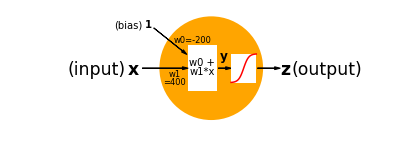

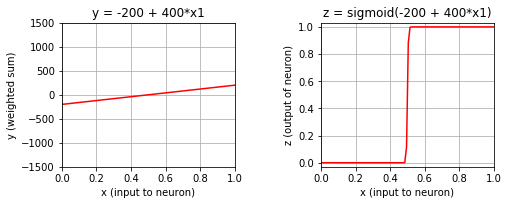

In [34]:
interact(oneNeuron1DInput, w0=widgets.IntSlider(min=-500, max=500, step=25, value=-200), w1=widgets.IntSlider(min=-500, max=500, step=25, value=400));

We assume the input ranges from 0 to 1 (to normalize different-ranged dimensions of the input). In addition to the input, there is a bias value of 1 added to provide more flexibility to the output.

The first operation done by the neuron is to multiply its inputs (including the bias value) with some weights, and sum those values:

$$y = w_{0} + w_{1}*x$$

The second operation is to make y non-linear. A common function that is used to non-linearity is the sigmoid function:

$$z = sigmoid(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(w_{0} + w_{1}*x)}}$$

This way, the output (z) always lies in the range of 0 to 1.


## Visualizing one neuron's action with a multi-dimensional input

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane). Let's visualize the output of a neuron fed with a 2-dimensional input:

In [101]:
# Visualizing one neuron's output, changing weights w_0, w_1 and w_2
def oneNeuron2DInput(w0, w1, w2):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.3])
    axes2 = fig1.add_axes([0.53, 0.2, 0.05, 0.1])
    # drawing x_0, x_1, x_2
    axes1.text(-3, 0.8, "(bias)")
    axes1.text(-2.3, 0.8, "x_0 = 1", weight='bold')
    axes1.arrow(-1.5, 0.7, 0.8, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2.3, -0.05, "x_1", weight='bold');
    axes1.arrow(-1.7, 0, 1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2, -0.9, "x_2", weight='bold')
    axes1.arrow(-1.8, -0.7, 1.1, 0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500'); axes1.add_patch(circle)
    axes1.text(-1.15, 0.55, "w0", size='small'); axes1.text(-1.5, 0.35, str(w0), size='small')
    axes1.text(-1.45, 0.06, "w1", size='small'); axes1.text(-1.45, -0.2, str(w1), size='small')
    axes1.text(-1.48, -0.45, "w2", size='small'); axes1.text(-1.2, -0.65, str(w2), size='small')
    wRectangle = plt.Rectangle((-0.6, -0.4), 0.65, 0.8, fc='w'); axes1.add_patch(wRectangle)
    axes1.text(-0.58, 0.25, "w0*x0", size='small'); axes1.text(-0.35, 0.1, "+", size='x-small')
    axes1.text(-0.58, -0.05, "w1*x1", size='small'); axes1.text(-0.35, -0.2, "+", size='x-small')
    axes1.text(-0.58, -0.35, "w2*x2", size='small')
    axes1.arrow(0.05, 0, 0.2, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.15, 0.3, "y", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "z", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x1 = np.linspace(0.0, 1.0, 50)
    x2 = np.linspace(0.0, 1.0, 50)
    X1,X2 = np.meshgrid(x1, x2)
    fig = plt.figure(figsize=(8, 3))
    # graph1
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X1, X2, (w0 + w1*X1 + w2*X2), rstride=5, cstride=5, linewidth=0)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-1000,1000])
    ax1.set_xlabel("x_1"); ax1.set_ylabel("x_2"); ax1.set_zlabel("y")
    ax1.set_title("y = "+str(w0)+" + "+str(w1)+"*x_1 + "+str(w2)+"*x_2")
    # graph2
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X1, X2, sigmoid(w0 + w1*X1 + w2*X2), rstride=2, cstride=2, cmap=matplotlib.cm.gray, linewidth=0.2);
    ax2.set_xlim([-0.03,1.03]); ax2.set_ylim([-0.03,1.03]); ax2.set_zlim([-0.03,1.03])
    ax2.set_xlabel("x_1"); ax2.set_ylabel("x_2"); ax2.set_zlabel("z")
    ax2.set_title("z = sigmoid("+str(w0)+" + "+str(w1)+"*x_1 + "+str(w2)+"*x_2)")
    fig.tight_layout()
    
w0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-200)
w1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=300)
w2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=150)

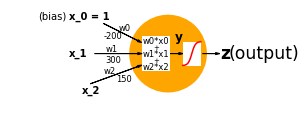

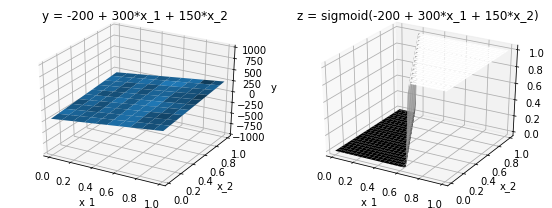

In [102]:
interact(oneNeuron2DInput, w0=w0Slider, w1=w1Slider, w2=w2Slider);

Try tweaking the weights w0, w1, w2 to see the changes to the output of the neuron, for all possibilities of x1 and x2.

To keep things simple, let us try to implement logic gates through neural networks.

Can you implement AND? (Hint: -250, 200, 200)

OR? (Hint: -100, 200, 200)

NAND? NOR?

XOR?

## Ill-posed problem

As can be seen, there are multiple solutions (weight tuples) that can solve the same problem. 

So, neural networks are ill-posed. It is also difficult to **arrive** at a solution from a random initialization - unless there are loads of inputs.

## Non-linear activation functions

- For classification problems, it is imperative that we use non-linear activation functions.

There's only so much one can do with linear combinations.

- Apart from sigmoid, other non-linear activations like ReLU (REctified Linear Unit), tanh can also be used.

## More neurons

- One neuron can make a planar decision boundary. 

The XOR function: {(0,0),(1,1)}==0;{(0,1),(1,0)}==1{(0,0),(1,1)}==0;{(0,1),(1,0)}==1, cannot have a linear boundary that is able to distinguish all of these 4 points into their classes correctly.

Thus, we need more neurons to be able to make more complicated decision boundaries.


In [109]:
# Visualizing three-layered neural network, changing weights w_0, w_1 and w_2
def threeNeurons2DInput(w11_0, w11_1, w11_2, w12_0, w12_1, w12_2, w2_0, w2_1, w2_2):
    fig, ax = plt.subplots(1, 1, figsize=(10,2))
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 2])
    # inputs
    ax.text(1.5, 1.2, "x_1", size='medium', weight='bold')
    circle = plt.Circle((2, 1.25), radius=.1, fc='k'); ax.add_patch(circle)
    ax.text(1.5, 0.7, "x_2", size='medium', weight='bold')
    circle = plt.Circle((2, 0.75), radius=.1, fc='k'); ax.add_patch(circle)
    # neurons
    circle = plt.Circle((4, 1.5), radius=.3, fc='#ffa500'); ax.add_patch(circle)
    circle = plt.Circle((4, 0.5), radius=.3, fc='#ffa500'); ax.add_patch(circle)
    circle = plt.Circle((6, 1), radius=.3, fc='#ffa500'); ax.add_patch(circle)
    # arrows
    ax.arrow(2, 1.25, 1.6, 0.3, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(2, 1.25, 1.6, -0.7, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(2, 0.75, 1.6, 0.7, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(2, 0.75, 1.6, -0.3, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(4.3, 1.5, 1.3, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(4.3, 0.5, 1.3, 0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # weights
    ax.text(2.75, 1.47, str(w11_1), size='x-small', weight='bold')
    ax.text(3.25, 1.17, str(w11_2), size='x-small', weight='bold')
    ax.text(2.9, 0.88, str(w12_1), size='x-small', weight='bold')
    ax.text(2.9, 0.4, str(w12_2), size='x-small', weight='bold')
    ax.text(4.7, 1.42, str(w2_1), size='x-small', weight='bold')
    ax.text(4.7, 0.52, str(w2_2), size='x-small', weight='bold')
    # biases
    ax.text(3.4, 1.7, "1", size='x-small', weight='bold')
    ax.arrow(3.5, 1.75, 0.15, -0.05, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(3.6, 1.8, str(w11_0), size='x-small', weight='bold')
    ax.text(3.4, 0.7, "1", size='x-small', weight='bold')
    ax.arrow(3.5, 0.75, 0.15, -0.05, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(3.6, 0.8, str(w12_0), size='x-small', weight='bold')
    ax.text(5.45, 1.25, "1", size='x-small', weight='bold')
    ax.arrow(5.55, 1.3, 0.15, -0.05, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(5.7, 1.3, str(w2_0), size='x-small', weight='bold')
    # output
    ax.arrow(6.3, 1, 0.5, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(7, 0.95, "z (output)", size='medium', weight='bold')
    
    ax.axis('off')

    # Figures
    x1 = np.linspace(0.0, 1.0, 50)
    x2 = np.linspace(0.0, 1.0, 50)
    X1,X2 = np.meshgrid(x1, x2)
    Y1 = sigmoid(w11_0 + w11_1*X1 + w11_2*X2)
    Y2 = sigmoid(w12_0 + w12_1*X1 + w12_2*X2)
    Z = sigmoid(w2_0 + w2_1*Y1 + w2_2*Y2)
    fig = plt.figure(figsize=(10, 2))
    # graph1
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.plot_surface(X1, X2, Y1, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-0.03,1.03])
    ax1.set_xlabel("x_1"); ax1.set_ylabel("x_2"); ax1.set_zlabel("y_1")
    ax1.set_title("y_1 = sigmoid("+str(w11_0)+" + "+str(w11_1)+"*x_1 + "+str(w11_2)+"*x_2)", size='medium')
    # graph2
    ax1 = fig.add_subplot(1, 3, 2, projection='3d')
    ax1.plot_surface(X1, X2, Y2, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-0.03,1.03])
    ax1.set_xlabel("x_1"); ax1.set_ylabel("x_2"); ax1.set_zlabel("y_2")
    ax1.set_title("y_2 = sigmoid("+str(w12_0)+" + "+str(w12_1)+"*x_1 + "+str(w12_2)+"*x_2)", size='medium')
    # graph3
    ax1 = fig.add_subplot(1, 3, 3, projection='3d')
    ax1.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([0.03,1.03])
    ax1.set_xlabel("x_1"); ax1.set_ylabel("x_2"); ax1.set_zlabel("z")
    ax1.set_title("z = sigmoid("+str(w2_0)+" + "+str(w2_1)+"*y_1 + "+str(w2_2)+"*y_2)", size='medium')
    fig.tight_layout()

w11_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-250)
w11_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=300)
w11_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=300)
w12_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-250)
w12_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=200)
w12_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=200)
w2_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-100)
w2_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=500)
w2_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-500)

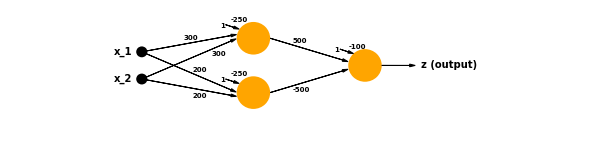

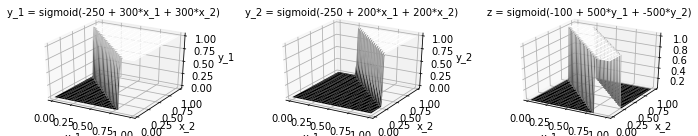

In [110]:
interact(threeNeurons2DInput, w11_0=w11_0Slider, w11_1=w11_1Slider, w11_2=w11_2Slider,
         w12_0=w12_0Slider, w12_1=w12_1Slider, w12_2=w12_2Slider,
         w2_0=w2_0Slider, w2_1=w2_1Slider, w2_2=w2_2Slider);

## Multi-dimensional input - matrix operations

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane).

Also suppose that 



In [ ]:
# MNIST DATA
# Use numpy.load() to load the .npz file
f = np.load('/Users/vikram.v/Downloads/mnist.npz')
# Saving the files
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']
f.close()
# To check data
print("x_train.shape = "+str(x_train.shape))
print("y_train.shape = "+str(y_train.shape))
fig = plt.figure(figsize=(10, 2))
for i in range(20):
    ax1 = fig.add_subplot(2, 10, i+1)
    ax1.imshow(x_train[i], cmap='gray');
    ax1.axis('off')